## 워드 클라우드
 - 한빛출판네트워크 > 새로나온책(200권) > TAG
 - TAG를 워드클라우드로 만들기

#### 1. 크롤링

In [1]:
import requests, re
import pandas as pd
from bs4 import BeautifulSoup
from tqdm.notebook import tqdm

In [2]:
site = 'https://www.hanbit.co.kr'
page1 = '/store/books/new_book_list.html?page=1'
url = site + page1
req = requests.get(url)
soup = BeautifulSoup(req.text, 'html.parser')

In [3]:
lis = soup.select('.sub_book_list_area > li')
len(lis)

20

In [5]:
li = lis[0]
href = li.find('a')['href']
href

'/store/books/look.php?p_code=B2831223974'

In [6]:
res = requests.get(site + href)
book_soup = BeautifulSoup(res.text, 'html.parser')

In [7]:
tags = book_soup.select('.tag_area > a')
len(tags)

14

In [10]:
tag_list = []
for a in tags:
    tag_list.append(a.get_text().strip())
print(tag_list)

['파이썬', '엑셀', 'VBA', '셀수식', '엑셀 자동화', '판다스', '파워 쿼리', '파워 피벗', '아나콘다 파이썬', '주피터 노트북', '비주얼 스튜디오 코드', '넘파이', '사용자 정의 함수', 'UDF']


In [12]:
tag_list = []
for page in tqdm(range(1, 11)):
    url = f'{site}/store/books/new_book_list.html?page={page}'
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    lis = soup.select('.sub_book_list')

    for li in lis:
        book_url = li.find('a')['href']
        res = requests.get(site + book_url)
        book_soup = BeautifulSoup(res.text, 'html.parser')
        tags = book_soup.select('.tag_area > a')
        for a in tags:
            tag_list.append(a.get_text().strip())

  0%|          | 0/10 [00:00<?, ?it/s]

In [13]:
tag_list[:10]

['파이썬',
 '엑셀',
 'VBA',
 '셀수식',
 '엑셀 자동화',
 '판다스',
 '파워 쿼리',
 '파워 피벗',
 '아나콘다 파이썬',
 '주피터 노트북']

In [14]:
len(tag_list)

2430

- tag_list를 frequency dictionary로 만들기

In [18]:
tag_set = set(tag_list)
len(tag_set)

1510

In [23]:
tag_dict = {}
for item in tag_set:
    tag_dict[item] = tag_list.count(item)

In [24]:
count = 0
for key, val in tag_dict.items():
    print(key,':',val)
    count += 1
    if count > 5:
        break

 : 1
모바일 프로그래밍 : 1
Apple : 1
프리젠테이션 : 1
글씨쓰기 : 4
보고서 작성 : 2


- 워드 클라우드 그리기

In [33]:
from wordcloud import WordCloud
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False
mpl.rcParams['font.family'] = 'Malgun Gothic'

In [34]:
wc = WordCloud(background_color='white',
               random_state=2022, 
               font_path='C:/Windows/Fonts/malgun.ttf')
wc = wc.generate_from_frequencies(tag_dict)

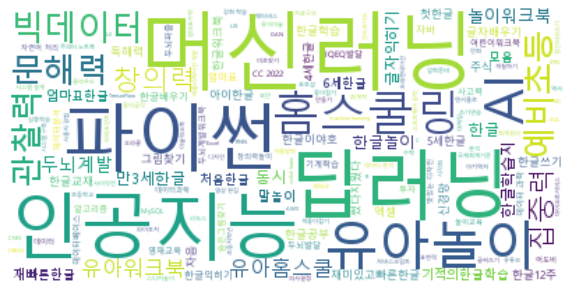

In [36]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 단어를 펼쳐서 워드 클라우드 만들기

In [37]:
tag_text = ' '.join(tag_list)

In [45]:
wc = WordCloud(background_color='white',
               random_state=2022, max_words=500,
               font_path='C:/Windows/Fonts/malgun.ttf')
wc = wc.generate(tag_text)

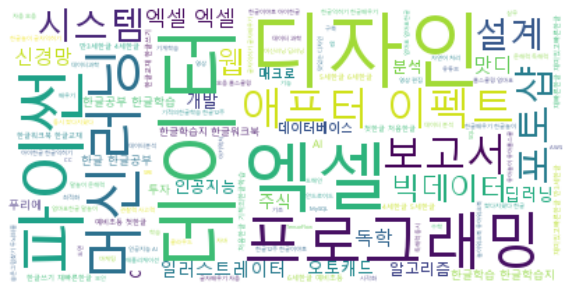

In [46]:
plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()